<h1>MANDATORY PACKAGES</h1>

In [1]:
import xarray
import os
%matplotlib inline  

<H1> GRIDED DATA</h2>

Donwload  a grided netCDF file with the motu-client and open it:

In [3]:
filename = 'global-analysis-forecast-phy-001-024.nc'
path2file = os.getcwd()#we pressume the file to open will be in the current working directory; set a different path otherwise

In [4]:
os.chdir(path2file)
netCDF = xarray.open_dataset(filename)

In [5]:
netCDF

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 721, longitude: 1441, time: 2)
Coordinates:
  * longitude  (longitude) float32 -60.0 -59.916668 ... 59.916668 60.0
  * latitude   (latitude) float32 -30.0 -29.916666 -29.833334 ... 29.916666 30.0
  * time       (time) datetime64[ns] 2019-03-21T12:00:00 2019-03-22T12:00:00
  * depth      (depth) float32 0.494025
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...

<H1>SELECT VARIABLE & SET ITS COORDINATES</H1>

From above we see temperature depends on time, lat, lon and depth; let's looks for its variation with deth & time by selection only a position and time:

In [6]:
timeSerie = netCDF['thetao'].sel(longitude=-170.0, latitude=29.90, method='nearest')

Closer coordinates found in mesh:

In [7]:
timeSerie.coords

Coordinates:
    longitude  float32 -60.0
    latitude   float32 29.916666
  * time       (time) datetime64[ns] 2019-03-21T12:00:00 2019-03-22T12:00:00
  * depth      (depth) float32 0.494025

Check temperature values the two available times and the only available depth:

In [8]:
timeSerie.values.tolist()

[[21.475357055664062], [21.42115592956543]]

Look for more information in google by searching: xarray Nearest neighbor lookups

<h1> TIME SERIE PLOT </H1>

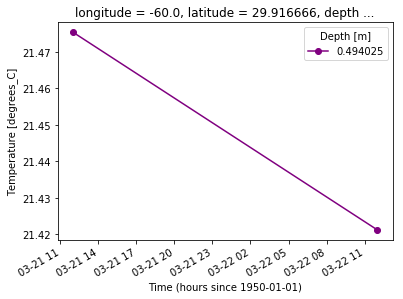

In [9]:
timeSerie.plot.line(x='time',color='purple', marker='o')